In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle("../data/eda_df.pkl")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Handling Missing values

In [ ]:
# Handling Missing Values @sabinvankathmandu
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

Missing Values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [5]:
# Dropping rows with missing values @sabinvankathmandu
df = df.dropna()
# check if rows with missing values are deleted
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Removing Outliers (Use IQR methods) 

In [8]:
# using Interquartile Range (IQR) to remove outliers - Chatgpt assisted code here @sabinvankathmandu
df.shape


(501, 14)

In [9]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1           # Interquartile range

    # Define outlier threshold
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_cleaned

# Apply function
df = remove_outliers(df)
print(f"New dataset shape after outlier removal: {df.shape}")

New dataset shape after outlier removal: (264, 14)


### Check to see if outliers from boxplots @sabinvankathmandu

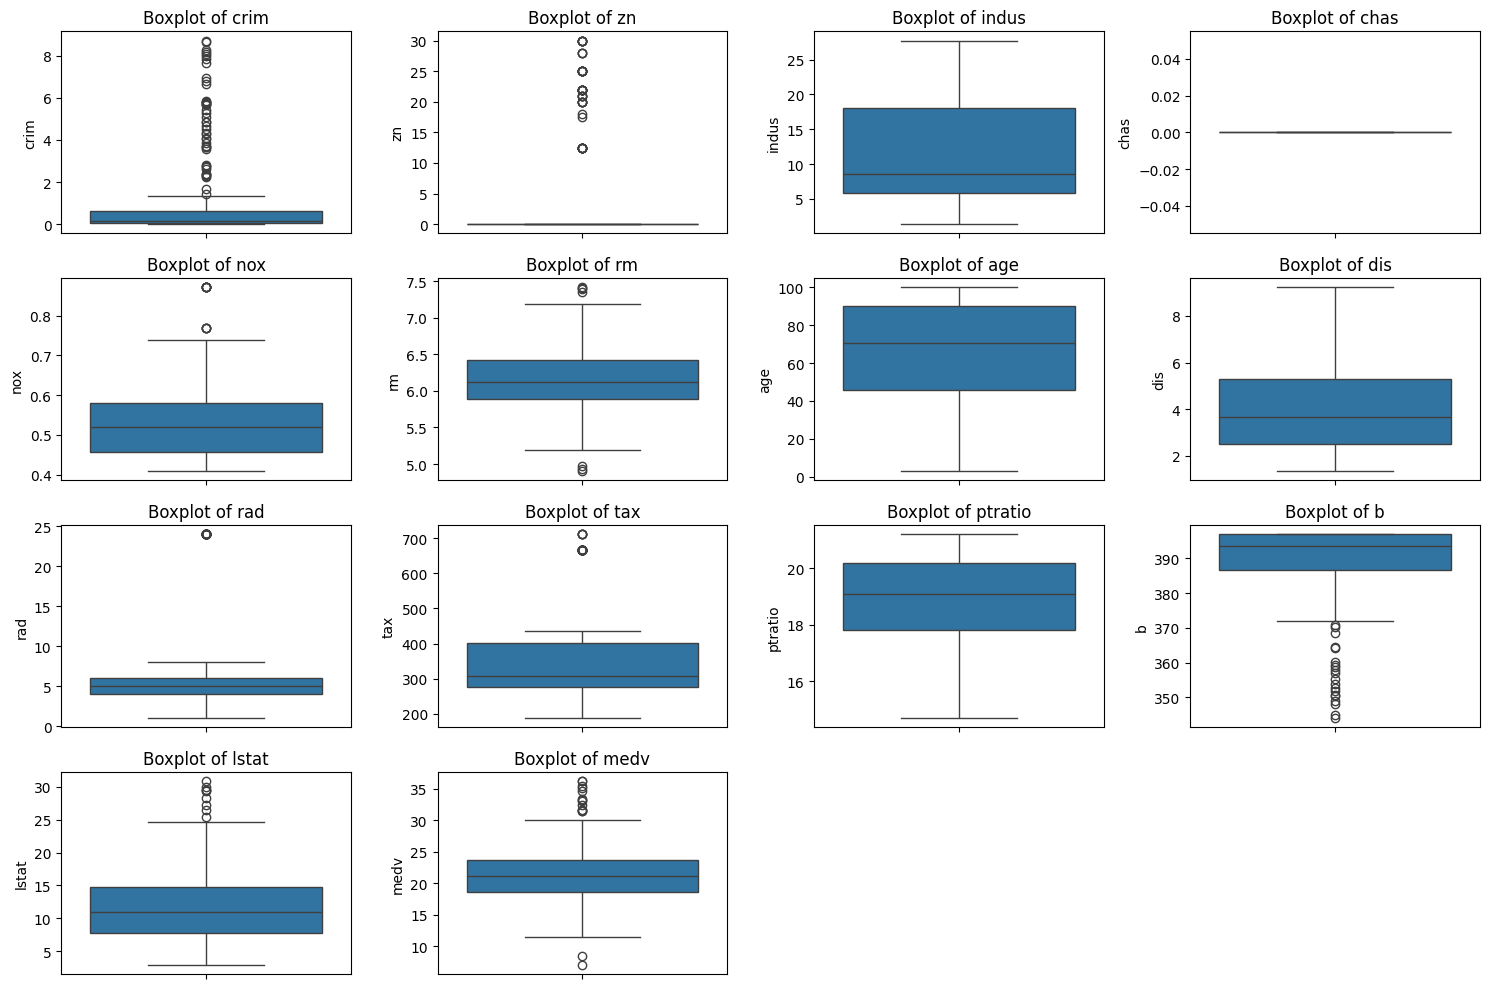

In [10]:
# Boxplots for Each Column for outliers detections @sabinvankathmandu

# Setting the figure size @sabinvankathmandu
plt.figure(figsize=(15, 10))

# create a boxplot by looping for each columns @sabinvankathmandu
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # adjusting rows & cols as needed (4x4 for 16 features)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()  # layout adujst to prevent overlapping @sabinvankathmandu
plt.show()

# Normalize / Standardize Numerical Features

In [12]:
scaler = StandardScaler()
# select onlynumerical features excluding target medv variables @sabinvankathmandu

features = df.drop(columns=["medv"])
target = df["medv"]

#standard scaler fitting
feature_scaled = scaler.fit_transform(features)

# DF scaled
df_scaled = pd.DataFrame(feature_scaled, columns=features.columns)


In [13]:
df_scaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.521944,1.641060,-1.322333,0.0,0.032465,0.961735,-0.029730,0.056381,-0.891363,-0.480450,-2.016847,0.703130,-1.285462
1,-0.511286,-0.447962,-0.577962,0.0,-0.676544,0.603579,0.481817,0.555501,-0.743827,-0.859744,-0.580439,0.703130,-0.522418
2,-0.511297,-0.447962,-0.577962,0.0,-0.676544,2.380407,-0.182821,0.555501,-0.743827,-0.859744,-0.580439,0.349376,-1.459715
3,-0.508717,-0.447962,-1.342663,0.0,-0.789574,1.945503,-0.754110,1.178675,-0.596291,-1.000223,-0.063333,0.505828,-1.659647
4,-0.490094,-0.447962,-1.342663,0.0,-0.789574,2.292031,-0.440461,1.178675,-0.596291,-1.000223,-0.063333,0.703130,-1.221264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-0.493353,-0.447962,0.182047,0.0,0.392107,1.003598,0.115893,-0.860597,-0.891363,-0.642001,1.258163,0.276365,-0.425203
260,-0.502168,-0.447962,0.182047,0.0,0.392107,-0.096455,0.399671,-0.969344,-0.891363,-0.642001,1.258163,0.703130,-0.533424
261,-0.494303,-0.447962,0.182047,0.0,0.392107,1.894337,0.933621,-1.037631,-0.891363,-0.642001,1.258163,0.703130,-1.164402
262,-0.469510,-0.447962,0.182047,0.0,0.392107,1.471062,0.870144,-0.911642,-0.891363,-0.642001,1.258163,0.403265,-1.010326


In [14]:
# appending our target columns @sabinvankathmandu
df_scaled["medv"] = target.values

In [17]:
df_scaled.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.521944,1.641060,-1.322333,0.0,0.032465,0.961735,-0.029730,0.056381,-0.891363,-0.480450,-2.016847,0.70313,-1.285462,24.0
1,-0.511286,-0.447962,-0.577962,0.0,-0.676544,0.603579,0.481817,0.555501,-0.743827,-0.859744,-0.580439,0.70313,-0.522418,21.6
